# Convolution Neural Networks

### q1 & q2


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
image = torch.rand(6,6)
print("image=", image)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
#Perform the convolution
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)

torch.Size([1, 6, 6])


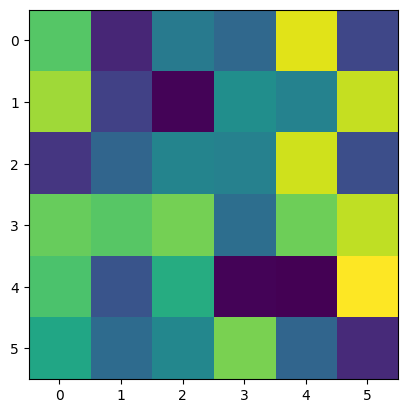

In [2]:
image = torch.rand(6,6)
plt.imshow(image)
image = image.unsqueeze(dim=0)
print(image.shape)

In [3]:
kernel = torch.ones(5,5).unsqueeze(dim = 0).unsqueeze(dim = 0)
outimage = F.conv2d(image, kernel,stride = 1, padding = 0)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 2, padding = 0)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 3, padding = 0)
print(outimage.shape)

torch.Size([1, 2, 2])
torch.Size([1, 1, 1])
torch.Size([1, 1, 1])


In [4]:
outimage = F.conv2d(image, kernel,stride = 1, padding = 1)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 1, padding = 2)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 1, padding = 3)
print(outimage.shape)

torch.Size([1, 4, 4])
torch.Size([1, 6, 6])
torch.Size([1, 8, 8])


In [5]:
import torch
import torch.nn.functional as F

# Define the input image and kernel
image = torch.rand(1, 1, 6, 6)  # (batch_size, channels, height, width)
kernel = torch.ones(1, 1, 3, 3)  # (out_channels, in_channels, kernel_height, kernel_width)

# Define different values for stride and padding
strides = [1, 2, 3]
paddings = [0, 1, 2]

# Function to calculate output size
def calculate_output_size(input_size, kernel_size, stride, padding):
    return ((input_size - kernel_size + 2 * padding) // stride) + 1

# Iterate over different combinations of stride and padding
for stride in strides:
    for padding in paddings:
        # Perform convolution
        out_image = F.conv2d(image, kernel, stride=stride, padding=padding)
        
        # Get the dimensions of the output image
        batch_size, channels, height, width = out_image.size()
        
        print(f"Stride: {stride}, Padding: {padding}")
        print(f"Output Image Size: ({height}, {width})")
        print()
        
        # Total number of parameters
        num_params = kernel.numel()
        print(f"Total number of parameters in the network: {num_params}")
        print("-" * 40)



Stride: 1, Padding: 0
Output Image Size: (4, 4)

Total number of parameters in the network: 9
----------------------------------------
Stride: 1, Padding: 1
Output Image Size: (6, 6)

Total number of parameters in the network: 9
----------------------------------------
Stride: 1, Padding: 2
Output Image Size: (8, 8)

Total number of parameters in the network: 9
----------------------------------------
Stride: 2, Padding: 0
Output Image Size: (2, 2)

Total number of parameters in the network: 9
----------------------------------------
Stride: 2, Padding: 1
Output Image Size: (3, 3)

Total number of parameters in the network: 9
----------------------------------------
Stride: 2, Padding: 2
Output Image Size: (4, 4)

Total number of parameters in the network: 9
----------------------------------------
Stride: 3, Padding: 0
Output Image Size: (2, 2)

Total number of parameters in the network: 9
----------------------------------------
Stride: 3, Padding: 1
Output Image Size: (2, 2)

Total 

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the input image and kernel
image = torch.rand(1, 1, 6, 6)  # (batch_size, channels, height, width)
out_channels = 3
kernel_size = 3

# Apply torch.nn.Conv2d
conv_layer = nn.Conv2d(in_channels=1, out_channels=out_channels, kernel_size=kernel_size, bias=False)
out_image_conv2d = conv_layer(image)

print("Output image using torch.nn.Conv2d:")
print(out_image_conv2d)
print()

# Implement equivalent using torch.nn.functional.conv2d
kernel = torch.rand(out_channels, 1, kernel_size, kernel_size)  # random kernel
out_image_functional_conv2d = F.conv2d(image, kernel, bias=None)

print("Output image using torch.nn.functional.conv2d:")
print(out_image_functional_conv2d)


Output image using torch.nn.Conv2d:
tensor([[[[-0.4321, -0.2788, -0.4556, -0.5541],
          [-0.1154, -0.5568, -0.2461, -0.4473],
          [-0.3111, -0.1763, -0.4725,  0.0351],
          [-0.1285, -0.6573, -0.1506, -0.4876]],

         [[-0.6240, -0.4271, -0.1747, -0.4689],
          [-0.1703, -0.0301, -0.5147, -0.6036],
          [-0.4389, -0.3291, -0.2070, -0.2763],
          [-0.3804, -0.3782, -0.5199, -0.4383]],

         [[ 0.1137,  0.3201,  0.4606,  0.3772],
          [ 0.2989,  0.4291,  0.1050,  0.1899],
          [ 0.2739,  0.2580,  0.2933,  0.1274],
          [ 0.2648,  0.3644,  0.0619,  0.4913]]]],
       grad_fn=<ConvolutionBackward0>)

Output image using torch.nn.functional.conv2d:
tensor([[[[1.8281, 1.9263, 2.0540, 2.3552],
          [1.6296, 1.5723, 2.1201, 1.9413],
          [2.5726, 2.4065, 1.3939, 2.0048],
          [2.2179, 1.9854, 2.4980, 2.7736]],

         [[2.0618, 2.0387, 2.6969, 2.7003],
          [1.5633, 2.0527, 2.1557, 2.1478],
          [2.6000, 2.1777, 1

3.
Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.
Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward
network on numerical data as outlined below.
Define model architecture
Load dataset from disk
Loop over epochs and batches
Make predictions and compute loss
Properly zero our gradient, perform backpropagation, and update model parameters

Using device: cuda:0
Epoch [1/5], Batch [100/938], Loss: 0.7037
Epoch [1/5], Batch [200/938], Loss: 0.1815
Epoch [1/5], Batch [300/938], Loss: 0.1195
Epoch [1/5], Batch [400/938], Loss: 0.1046
Epoch [1/5], Batch [500/938], Loss: 0.0881
Epoch [1/5], Batch [600/938], Loss: 0.0952
Epoch [1/5], Batch [700/938], Loss: 0.0815
Epoch [1/5], Batch [800/938], Loss: 0.0715
Epoch [1/5], Batch [900/938], Loss: 0.0693
Epoch [2/5], Batch [100/938], Loss: 0.0487
Epoch [2/5], Batch [200/938], Loss: 0.0499
Epoch [2/5], Batch [300/938], Loss: 0.0506
Epoch [2/5], Batch [400/938], Loss: 0.0470
Epoch [2/5], Batch [500/938], Loss: 0.0497
Epoch [2/5], Batch [600/938], Loss: 0.0430
Epoch [2/5], Batch [700/938], Loss: 0.0507
Epoch [2/5], Batch [800/938], Loss: 0.0525
Epoch [2/5], Batch [900/938], Loss: 0.0397
Epoch [3/5], Batch [100/938], Loss: 0.0274
Epoch [3/5], Batch [200/938], Loss: 0.0349
Epoch [3/5], Batch [300/938], Loss: 0.0315
Epoch [3/5], Batch [400/938], Loss: 0.0376
Epoch [3/5], Batch [500/938], Los

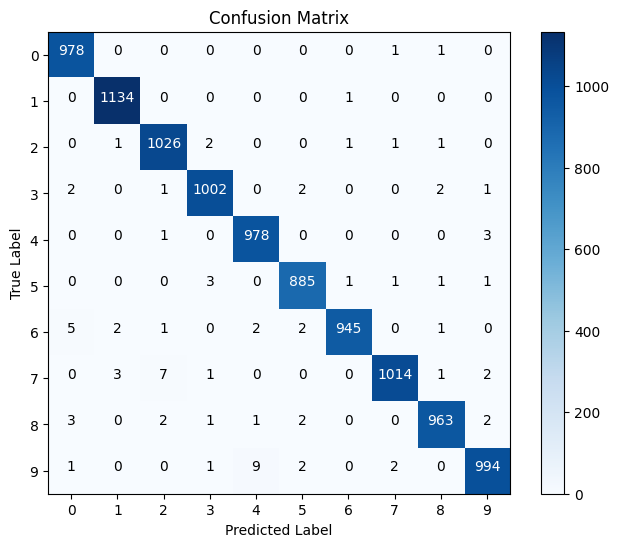

Total number of learnable parameters: 80202


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 32 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Instantiate the model
model = CNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

# Test the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')
    return np.array(y_true), np.array(y_pred)

# Train the model
train(model, train_loader, criterion, optimizer, num_epochs=5)

# Test the model
y_true, y_pred = test(model, test_loader)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()

# Number of learnable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")


Using device: cuda:0
Epoch [1/5], Batch [100/938], Loss: 1.1658
Epoch [1/5], Batch [200/938], Loss: 0.3216
Epoch [1/5], Batch [300/938], Loss: 0.2317
Epoch [1/5], Batch [400/938], Loss: 0.2030
Epoch [1/5], Batch [500/938], Loss: 0.1605
Epoch [1/5], Batch [600/938], Loss: 0.1303
Epoch [1/5], Batch [700/938], Loss: 0.1239
Epoch [1/5], Batch [800/938], Loss: 0.1222
Epoch [1/5], Batch [900/938], Loss: 0.1084
Epoch [2/5], Batch [100/938], Loss: 0.0971
Epoch [2/5], Batch [200/938], Loss: 0.0918
Epoch [2/5], Batch [300/938], Loss: 0.0875
Epoch [2/5], Batch [400/938], Loss: 0.0858
Epoch [2/5], Batch [500/938], Loss: 0.0769
Epoch [2/5], Batch [600/938], Loss: 0.0884
Epoch [2/5], Batch [700/938], Loss: 0.0791
Epoch [2/5], Batch [800/938], Loss: 0.0809
Epoch [2/5], Batch [900/938], Loss: 0.0657
Epoch [3/5], Batch [100/938], Loss: 0.0602
Epoch [3/5], Batch [200/938], Loss: 0.0637
Epoch [3/5], Batch [300/938], Loss: 0.0644
Epoch [3/5], Batch [400/938], Loss: 0.0576
Epoch [3/5], Batch [500/938], Los

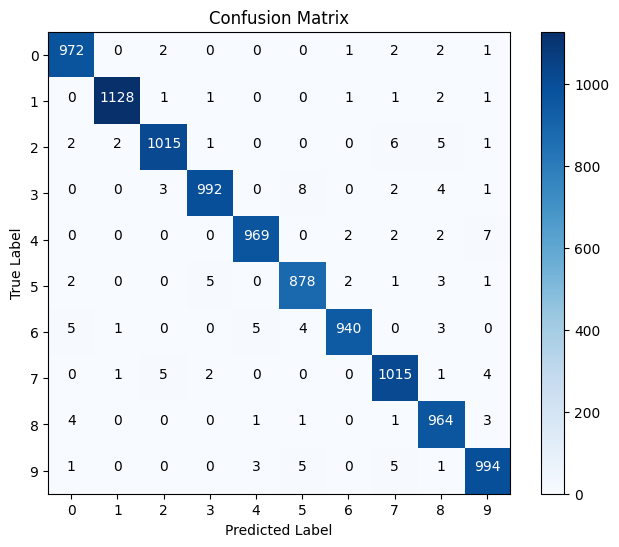

Total number of learnable parameters: 27562
Accuracy: 0.9867
Percentage Drop in Parameters: 15.29%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define Modified CNN architecture
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Instantiate the model
model = ModifiedCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

# Test the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')
    return np.array(y_true), np.array(y_pred)

# Train the model
train(model, train_loader, criterion, optimizer, num_epochs=5)

# Test the model
y_true, y_pred = test(model, test_loader)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()

# Number of learnable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")

# Calculate accuracy
accuracy = (y_pred == y_true).mean()
print(f"Accuracy: {accuracy}")

# Percentage drop in parameters vs accuracy
original_params = 32538  # Number of parameters in the original model
percentage_drop = ((original_params - total_params) / original_params) * 100
print(f"Percentage Drop in Parameters: {percentage_drop:.2f}%")
